# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [69]:
# Import the appropriate libraries with aliases
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import style

# Create two new dataframes
north_df = pd.read_csv("NorthCallCenter.csv",index_col=[0])
south_df = pd.read_csv("SouthCallCenter.csv",index_col=[0])

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, answer the following questions. In the code blocks below enter the code used to solve the question.  At the end of the section record your answers by double clicking where asked.

#### EDA Question 1A:  How many reps are in the North branch?  

In [70]:
#Code Used:
north_df["Rep ID"].nunique( )

9

#### EDA Question 1B:  How many reps are in the South branch?  

In [71]:
#Code Used:
south_df["Rep ID"].nunique( )

11

#### EDA Question 2A:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the North branch? 

In [72]:
#Code Used:
north_df[["Busy Minutes", "Not Ready Minutes", "Incoming Wait Time", "During Call Wait Time"]].mean()

Busy Minutes             9.987755
Not Ready Minutes        1.914286
Incoming Wait Time       3.048780
During Call Wait Time    2.967347
dtype: float64

#### EDA Question 2B:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the South branch? 

In [73]:
#Code Used:
south_df[["Busy Minutes", "Not Ready Minutes", "Incoming Wait Time", "During Call Wait Time"]].mean()

Busy Minutes             10.054140
Not Ready Minutes         1.910828
Incoming Wait Time        3.000000
During Call Wait Time     3.076433
dtype: float64

#### EDA Question 3:  What is the number of calls taken for each time block(Both North and South combined)?

In [74]:
# Code Used:
north_df["Time Block"].value_counts() + south_df["Time Block"].value_counts()

10:00 AM     99
11:00 AM     56
12:00 PM    120
1:00 PM      40
2:00 PM      65
3:00 PM      73
4:00 PM      53
5:00 PM      43
9:00 AM      10
Name: Time Block, dtype: int64

##### Record your answers for the EDA section by double clicking here:
- 1a) Reps in the North Branch = 9
- 1b) Reps in the South Branch = 11


- 2a) North Branch, (round to the nearest hundredth):
> - Busy Minutes = 9.99
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.05
> - During Call Wait Time = 2.99
- 2b) South Branch, (round to the nearest hundredth):
> - Busy Minutes = 10.05
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.00
> - During Call Wait Time = 3.08
- 3) Total Calls taken for all branches per time block:
> - 9:00AM   = 10
> - 10:00AM  = 99
> - 11:00AM  = 56
> - 12:00PM  = 120
> - 1:00PM   = 40
> - 2:00PM   = 65
> - 3:00PM   = 73
> - 4:00PM   = 53
> - 5:00PM   = 43



<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Cleaning Your Data 
Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. 

#### Cleaning Question 1:  Is there any missing data and if yes explain what you would do with the missing data and why?
##### Record your answer by double clicking here:
> Your Answer: The only data that is missing is the "Incoming Wait Time." However, I noticed that there are no rows with 0.0 seconds of Incoming Wait Time. So I replaced all the null values with 0.0 seconds. Kara also pointed out to me that all of the entries with no "Incoming Wait Time" are Outgoing calls so it would make sense that there would be no wait time. 

In [75]:
# Code Used
# Add Additional Cells as needed.
print(north_df.shape)
print(south_df.shape)

(245, 14)
(314, 14)


In [76]:
north_df.isnull( ).sum( )

Branch                     0
Call Purpose               0
Time Block                 0
Incoming or Outgoing       0
Queue                      0
Rep ID                     0
Sale                       0
Lost Call                  0
Abandoned                  0
Busy Minutes               0
Not Ready Minutes          0
Incoming Wait Time       163
During Call Wait Time      0
Calls                      0
dtype: int64

In [77]:
north_df["Incoming Wait Time"].value_counts()

4.0    20
1.0    17
5.0    17
2.0    16
3.0    12
Name: Incoming Wait Time, dtype: int64

In [78]:
south_df.isnull( ).sum( )

Branch                     0
Call Purpose               0
Time Block                 0
Incoming or Outgoing       0
Queue                      0
Rep ID                     0
Sale                       0
Lost Call                  0
Abandoned                  0
Busy Minutes               0
Not Ready Minutes          0
Incoming Wait Time       188
During Call Wait Time      0
Calls                      0
dtype: int64

In [79]:
south_df["Incoming Wait Time"].value_counts()

4.0    30
3.0    29
2.0    28
1.0    20
5.0    19
Name: Incoming Wait Time, dtype: int64

In [80]:
north_df["Incoming Wait Time"] = north_df["Incoming Wait Time"].fillna(0.0)

In [81]:
south_df["Incoming Wait Time"] = south_df["Incoming Wait Time"].fillna(0.0)

#### Cleaning Question 2:  In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
##### Record your answer by double clicking here:
> Your Answer: I found how many of each value there were and wasn't able to tell why YES is different from YES. So I manually went through the data to see that the miscounted value is "YES " instead of "YES." I changed this one value and recounted.

In [82]:
#Code Used
# Add Additional Cells as needed.
north_df["Sale"].value_counts()

NO      234
YES      10
YES       1
Name: Sale, dtype: int64

In [83]:
north_df.loc[north_df["Sale"] == "YES ", "Sale"] = "YES"

In [84]:
north_df["Sale"].value_counts()

NO     234
YES     11
Name: Sale, dtype: int64

#### Cleaning Question 3:  Are there duplicates in the two data sets? If there are, how did you handle them?
##### Record your answer by double clicking here:
> Your Answer: Yes, there are 2 duplicates in North and 3 duplicates in South. It's unlikely but does make sense that a rep would take more than one phone call in one block of time that addressed the same issues and had the same wait times, etc. So while I did drop the duplicates in order to check how many there are, I would leave the duplicates in as they more than likely represent different calls.

In [85]:
#Code Used
# Add Additional Cells as needed.
north_no_dups = north_df.drop_duplicates()

In [86]:
print(north_no_dups.shape)

(243, 14)


In [87]:
south_no_dups = south_df.drop_duplicates()

In [88]:
print(south_no_dups.shape)

(311, 14)


#### Cleaning Question 4:  Is any of the data in the two data sets unnecessary? If yes, how did you handle it?
##### Record your answer by double clicking here:
> Your Answer: I don't think any of the data is unnecessary. It's important to know which center has more lost or abandoned calls. Also, each of the time columns represent specific reasons why the customer is waiting and it would skew data to get rid of any of them. I could see how 'Call Purpose', 'Time Block', 'Incoming or Outgoing', 'Queue', or 'Sale' wouldn't necessarily help us identify the overall efficiency of reps of call centers. However, they could help find other patterns such as a problem with queue functionality, which call purposes take longer, what time of day gets the most calls, which center is making more calls than receiving, etc.

In [89]:
#Code Used
# Add Additional Cells as needed.


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Data Manipulation
Before you begin answering any questions, combine the two datasets together to create a third dataframe called df. You can use this third dataframe to compare the two call centers to company-wide trends.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. Record your answer by double clicking the below cell.

In [90]:
# Create dataframe for the entire company named df
df = pd.merge(north_df, south_df, how="outer")

#### Manipulation Question 1:  Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.

##### Record your answer by double clicking here:
Rep with the hightest number of calls and their total calls:
- North Branch = Brent
- South Branch = Eric


In [91]:
# Code Used
# Add Additional Cells as needed.
north_sort_by_calls = north_df.groupby("Rep ID").sum().sort_values(by=['Calls'], ascending=False)
north_sort_by_calls

,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
Rep ID,,,,,,,
Brent,0,1,362,71,17.0,117,37
Lilly,0,2,307,59,37.0,88,30
Duke,2,0,292,56,39.0,85,29
Todd,1,0,296,58,21.0,97,29
Joe,0,0,256,49,36.0,81,26
Cam,1,0,233,46,32.0,66,24
Xander,1,0,244,44,20.0,68,24
Amanda,0,1,229,43,12.0,60,23
Andy,0,3,228,43,36.0,65,23


In [92]:
south_sort_by_calls = south_df.groupby("Rep ID").sum().sort_values(by=['Calls'], ascending=False)
south_sort_by_calls

,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
Rep ID,,,,,,,
Eric,0,0,361,54,47.0,112,35
Randy,3,1,320,66,47.0,98,33
Sandy,1,0,325,60,34.0,100,32
Helga,0,2,292,58,36.0,95,31
George,0,0,298,53,41.0,87,29
Kate,0,0,291,61,37.0,83,29
Karl,1,0,287,61,26.0,85,28
Josh,3,0,260,50,31.0,83,26
Susan,2,0,267,53,35.0,88,26


#### Manipulation Question 2:  The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
##### Record your answer by double clicking here:
Average Call Abandonment Rates (round to the nearest hundredth):
- North Branch = 2.86%
- South Branch = 1.27%
- Company Wide = 1.97%
- Do any of these fall out of the optimal range of 2-5%? yes, both the south branch and company wide rate are under 2%

In [93]:
# Code Used
# Add Additional Cells as needed.
north_abandon_rate = (north_df["Abandoned"].sum() / north_df["Calls"].sum()) * 100
north_abandon_rate

2.857142857142857

In [94]:
south_abandon_rate = (south_df["Abandoned"].sum() / south_df["Calls"].sum()) * 100
south_abandon_rate

1.2738853503184715

In [95]:
company_abandon_rate = (df["Abandoned"].sum() / df["Calls"].sum()) * 100
company_abandon_rate

1.9677996422182469

#### Manipulation Question 3:  Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?
##### Record your answer by double clicking here:
Percentage of calls answered within 2 seconds, include # of calls:
- North Branch = 80.0, 196
- South Branch = 75.16, 236
- Company Wide = 77.28, 432

In [96]:
# Code Used
# Add Additional Cells as needed.
north_count = len(north_df[north_df["Incoming Wait Time"]<=2])
north_rate = (north_count / north_df["Calls"].sum()) * 100
north_count, north_rate

(196, 80.0)

In [97]:
south_count = len(south_df[south_df["Incoming Wait Time"]<=2])
south_rate = (south_count / south_df["Calls"].sum()) * 100
south_count, south_rate

(236, 75.15923566878982)

In [98]:
company_count = len(df[df["Incoming Wait Time"]<=2])
company_rate = (company_count / df["Calls"].sum()) * 100
company_count, company_rate

(432, 77.28085867620752)

#### Manipulation Question 4: For each branch and the entire company, what is the average speed of answer?
##### Record your answer by double clicking here:
Average speed of answer (rounded to nearest hundredth):
- North Branch in seconds = 1.02
- South Branch in seconds = 1.20
- Company Wide in seconds = 1.12


In [99]:
# Code Used 
north_df["Incoming Wait Time"].mean()

1.0204081632653061

In [100]:
south_df["Incoming Wait Time"].mean()

1.2038216560509554

In [101]:
df["Incoming Wait Time"].mean()

1.1234347048300537

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why. 

*NOTE Some questions you may decide to use more than one chart and or chart style.

#### Visualization 1:  What is the average abandonment rate per queue?
##### Record your answer by double clicking here:

> Chart style you chose and why: I chose a bar chart as this is the easiest way to compare variables with different values that aren't on a timeline or don't correlate with each other.

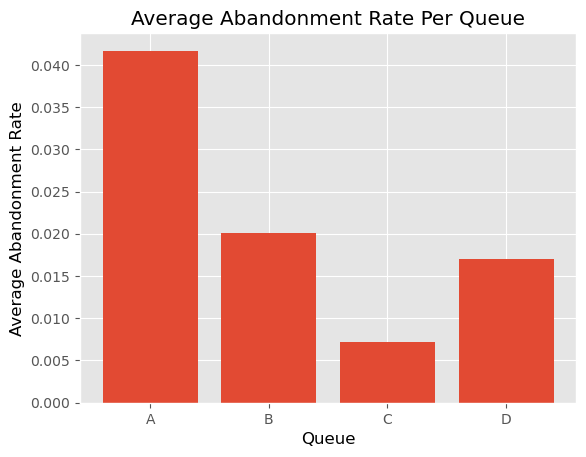

In [102]:
# Create visualization 1 here
# Import any additional libraries needed with alias
style.use('ggplot')


# The dictionary abandonment_rates has the data you need.
abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i] 

#Your Code Here:
plt.bar(queues, abandonment_rates.values())

plt.title('Average Abandonment Rate Per Queue',color = 'black')
plt.xlabel('Queue',color = 'black')
plt.ylabel('Average Abandonment Rate',color = 'black')

plt.show()




#### Visualization 2: What is the service level percentage and average speed of answer for each rep in the North Branch?
##### Record your answer by double clicking here:

> Chart style you chose and why: I chose horizontal bar chart as it would be best to see how each rep is doing in each category without being in the same chart as what is being measured on each axis is different.

In [103]:
# Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep

north_plt = north_df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()
reps = ["Brent", "Lilly", "Todd", "Duke", "Joe", "Cam", "Xander", "Amanda", "Andy"]

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = north_df[north_df["Incoming Wait Time"] <= 2.0]
quick_calls = quick_calls[quick_calls["Incoming or Outgoing"] == "Incoming"] #I edited this due to my change earlier
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table


# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = north_df[north_df["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100

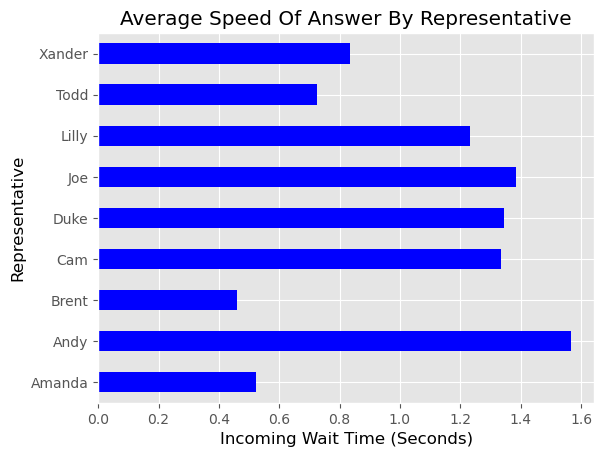

In [104]:
north_plt.plot.barh(x = "Rep ID", y = "Incoming Wait Time", legend = False, color = 'blue')

plt.title('Average Speed Of Answer By Representative',color = 'black')
plt.xlabel('Incoming Wait Time (Seconds)',color = 'black')
plt.ylabel('Representative',color = 'black')

plt.show()

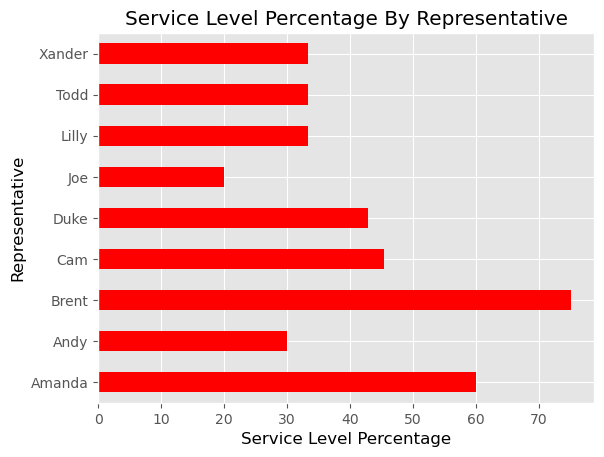

In [105]:
service_level.plot.barh(y = "Service Level %", legend = False, color = 'red')

plt.title('Service Level Percentage By Representative',color = 'black')
plt.xlabel('Service Level Percentage',color = 'black')
plt.ylabel('Representative',color = 'black')

plt.show()

#### Visualization 3: For each type of call purpose, how many calls are outgoing vs. incoming?
##### Record your answer by double clicking here:

> Chart style you chose and why: I chose grouped bar chart as it would best display the difference in amounts between incoming and outcoming for each call purpose.

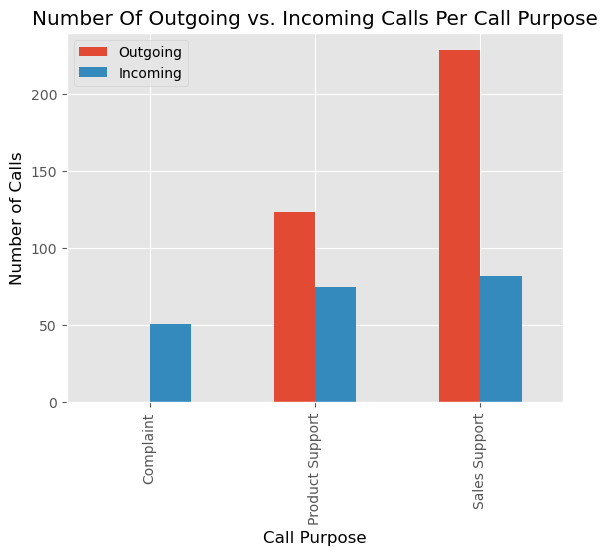

In [106]:
# Create visualization 3 here:
# The three dictionaries, complaints, sales_support, and product_support, have the information you need

purpose_group = df.groupby(["Call Purpose"])
call_purpose = ["Complaint", "Product Support", "Sales Support"]
purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()

complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()

# Your Code Here
bar_df = pd.DataFrame({"Call Purpose": call_purpose,
                       "Outgoing": [0, sales_support["Outgoing"], product_support["Outgoing"]], 
                       "Incoming": [complaints["Incoming"], sales_support["Incoming"], product_support["Incoming"]]})

bar_df.plot(x = "Call Purpose", y = ["Outgoing", "Incoming"], kind = "bar")

plt.title("Number Of Outgoing vs. Incoming Calls Per Call Purpose",color = 'black')
plt.xlabel("Call Purpose",color = 'black')
plt.ylabel("Number of Calls",color = 'black')

plt.show()

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.


#### Summary Question 1:  Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?

##### Record your answer by double clicking here:
> Your Answer: The North branch is faster to answer phone calls based on the service level and average speed of answer but the South branch is less likely to have a call abandoned based on the abandonment rate. So I would say the North branch is more efficient in answering the call but the South branch is more efficient during the call. 




#### Summary Question 2: Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?

##### Record your answer by double clicking here:
> Your Answer: The representative Brent of the North branch seems to efficently take calls but the call itself doesn't go as smoothly based on their average speed of answer and service level. Based on this and my answer above I would say the North branch needs the extra help if extra reps is the only solution. However, I would recommend the North branch do additional training to improve service level and average abandonment rate and the South branch get the extra employees to improve average speed of answer.


#### Summary Question 3: Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

##### Record your answer by double clicking here:
> Your Answer: Total Length of call would be helpful in terms of comparing the amount of time that customers were made to wait compared to how long the total call was. If it was a complicated issue that took a longer call or a short call but the customer was kept waiting for a while in comparison, those would be good things to know.


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Bonus Mission
Create a visualization that answers this question: For each call purpose, how many calls (incoming and outgoing) take place in each time block?
##### Record your answer by double clicking here:

> Chart style you chose and why: 

In [ ]:
# Create your Bonus Mission visualization here!
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]

# Use groupby to plot based on time blocks:

# Use groupby and get_group to select which call purpose to plot: